In [1]:
import pandas as pd
import numpy as np
import wfdb
import ast
from collections import Counter
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from scipy.signal import spectrogram
import cv2

In [2]:
def load_raw_data(df, path):
    data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [3]:
path='ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3\\'

In [4]:
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

# Load raw signal data
X = load_raw_data(Y, path) 

In [5]:
Y.shape

(21799, 27)

In [7]:
Y

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr


In [8]:
Counter(Y['burst_noise'])

Counter({nan: 21186,
         'V5': 13,
         'I-V1': 21,
         'I-V2': 20,
         'V2': 22,
         'I,III,AVL': 4,
         'III,AVL': 1,
         'V4': 12,
         'I-AVR': 24,
         'I-AVF': 47,
         'V2,3': 1,
         'II': 6,
         'V3-V5': 1,
         'v5-6': 5,
         'v5,6': 4,
         'v6': 15,
         'v3': 17,
         'v1-2': 1,
         'v4': 8,
         'v2,3': 3,
         'V1,V3': 1,
         'V2,4': 1,
         'V5,6': 1,
         'I': 3,
         'alles': 140,
         'alle': 4,
         'v1': 7,
         'v3-4': 5,
         'III': 1,
         ' ': 1,
         'v2': 10,
         'II, III, avf': 1,
         'v1-6': 5,
         'I,III,AVL,AVF;V6': 1,
         'V1': 46,
         'V3': 13,
         'v3,6': 1,
         'V2-V6': 3,
         'v5': 11,
         'I,II,AVL-V6': 1,
         'I-ALF': 2,
         'V4,5,6': 1,
         'v3-5': 1,
         'II-V1': 2,
         'V1,V2': 28,
         'I,II,AVL,AVR': 1,
         'V4-V6': 1,
         'V2,V3': 1

In [9]:
Y.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


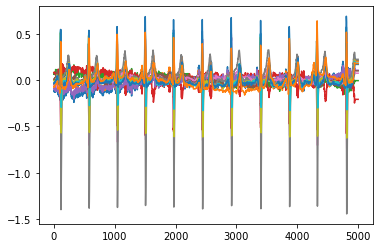

In [10]:
plt.plot(X[0])

имеем 5000 кортежей по 12 элементов - каждый элемент в кортеже отвечает за своё отведение

In [11]:
len(X[0])

5000

пока пробую всё для первого отведения

In [12]:
X_1=[]
for i in range(len(X)):
    tmp=[]
    for j in range(len(X[i])):
        for k in range(12):
            if k==0:
                tmp.append(X[i][j][k]*1000)
    X_1.append(tmp)

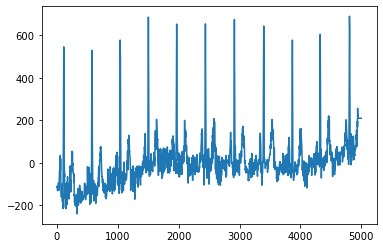

In [13]:
plt.plot(X_1[0])

спектрограмма - на оси абсцисс время, на оси ординат - частота, цвет отвечает за амплитуду  

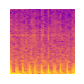

In [21]:
plt.figure(figsize=(0.83, 0.86), dpi=100)
plt.ylim(top=1)
plt.ylim(bottom=0)
plt.axis('off')
plt.specgram(X_1[0], cmap='plasma')
plt.savefig('foo.png', bbox_inches='tight', pad_inches=0)

In [22]:
'''
freqs, times, Sx = spectrogram(np.array(X_1[2339]))
plt.pcolormesh(times, freqs, 
               Sx, shading='gouraud')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');
plt.ylim(top=0.4)
plt.show()
'''

"\nfreqs, times, Sx = spectrogram(np.array(X_1[2339]))\nplt.pcolormesh(times, freqs, \n               Sx, shading='gouraud')\nax.set_ylabel('Frequency [kHz]')\nax.set_xlabel('Time [s]');\nplt.ylim(top=0.4)\nplt.show()\n"

In [23]:
img2 = cv2.imread('foo.png')

In [24]:
img2.shape

(64, 64, 3)

In [25]:
r, g, b = cv2.split(img2)

In [31]:
g*0.1 + b*0.7 + r*0.2

array([[156.8, 151. , 136.7, ..., 144.9, 147.6, 145.7],
       [161.2, 156. , 143.7, ..., 144.9, 145.7, 156. ],
       [106.2, 127.7, 164.2, ..., 151.6, 151. , 156. ],
       ...,
       [203.4, 204.5, 201.2, ..., 203.6, 204.6, 204.5],
       [203.8, 203.8, 204.5, ..., 202.4, 203.5, 204.3],
       [204. , 204. , 203.5, ..., 204.5, 202.9, 203.1]])

In [36]:
specs_1channel=[]

In [37]:
for i in range(len(X_1)):
    plt.figure(figsize=(0.83, 0.86), dpi=100)
    plt.ylim(top=1)
    plt.ylim(bottom=0)
    plt.axis('off')
    plt.specgram(X_1[i], cmap='plasma')
    plt.savefig('foo.png', bbox_inches='tight', pad_inches=0)
    plt.close()
    img2 = cv2.imread('foo.png')
    r, g, b = cv2.split(img2)
    specs_1channel.append(r*0.3+g*0.59+b*0.11)

In [38]:
specs_1channel[23].shape

(64, 64)

In [39]:
len(specs_1channel)

21799

In [40]:
specs_1channel = np.array(specs_1channel)

In [41]:
with open('specs_1channel.npy', 'wb') as f:
    np.save(f, specs_1channel)

<Figure size 1440x1440 with 0 Axes>

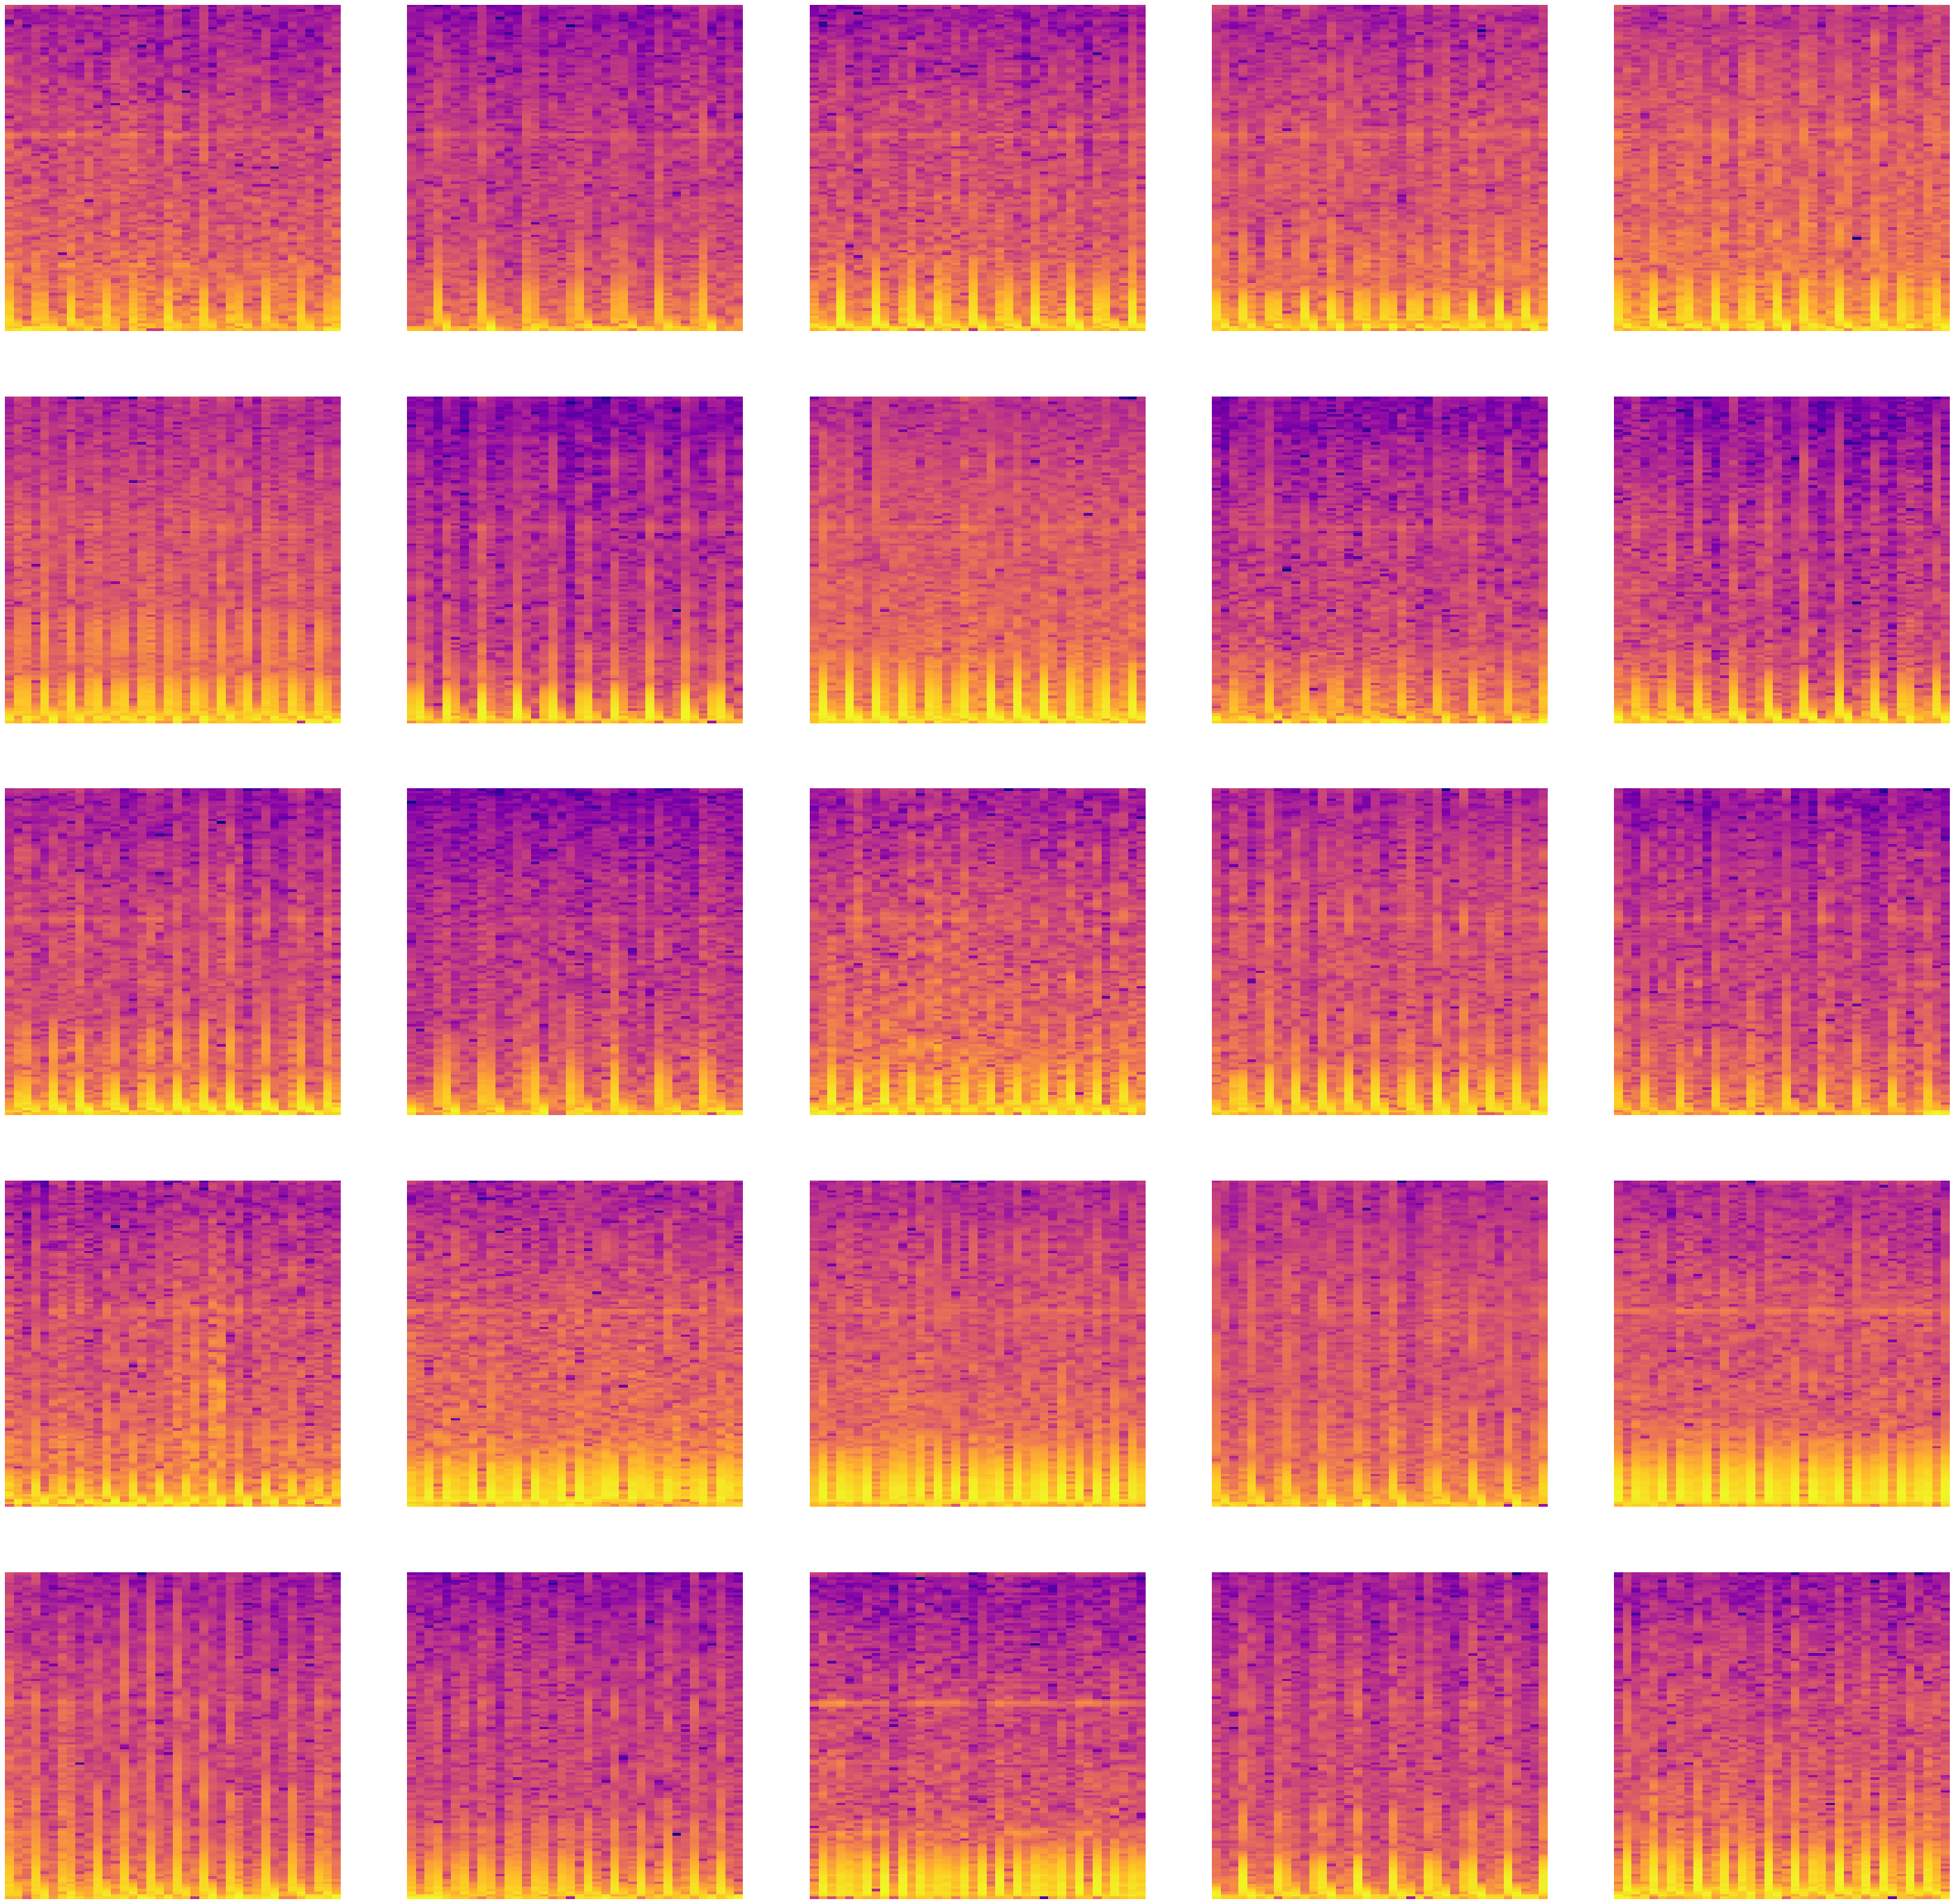

In [347]:
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
ncols = 5
nrows = 5
n=0
fig, axs = plt.subplots(5, 5, figsize=(50, 50))
for i in range(25):
    ax = plt.subplot(nrows, ncols, n + 1)
    ax.axis('off')
    ax.specgram(X_1[i], cmap='plasma')
    n+=1
plt.savefig('examples.png')